In [60]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import h2o
from h2o.automl import H2OAutoML
from h2o.tree import H2OTree

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from scipy.stats import gaussian_kde

In [63]:
df = pd.read_pickle("../../data/df.pkl")

### IA Filter

In [64]:
df = df.loc[df.type_bool == True]
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN10005,"[[10.027000000001863, 4.996, 8.081], [33.94500...","[[0.015000000006693881, 0.2977, 2.206], [18.94...","[[0.0, 1.033, 1.325], [13.015000000006694, 0.4...","[[0.03500000000349246, 1.826, 3.029], [48.875,...","[0.0, 1.0381919191919462, 2.0763838383838924, ...","([10.027000000001863, 10.782565656567513, 11.5...","([0.015000000006693881, 1.0530404040470573, 2....","([0.0, 1.0281717171717606, 2.056343434343521, ...","([0.03500000000349246, 1.0222929292964054, 2.0...","[2.000004411755352, 2.000003547336676, 2.00000...",...,-26.554909,15.768490,16.436792,17.114795,-20.292951,-24.222566,-11.295562,Ia,True,1.08327
SN10007,"[[0.0, 6.266, 10.48], [10.105999999999767, 17....","[[0.03200000000651926, 7.161, 9.313], [2.01600...","[[2.0, 1.24, 2.429], [10.121000000006461, 20.0...","[[0.9770000000062282, 0.6586, 5.329], [15.9930...","[0.0, 1.5136565656566285, 3.027313131313257, 4...","([0.0, 1.5132626262626456, 3.0265252525252913,...","([0.03200000000651926, 1.5451717171782005, 3.0...","([2.0, 3.49314141414145, 4.9862828282829, 6.47...","([0.9770000000062282, 2.480787878794107, 3.984...","[11.341091517194192, 8.812204685737349, 6.9798...",...,-99.877031,21.670852,24.155364,-26.622112,-27.616185,-19.981432,49.299250,Ia,True,0.82331
SN100361,"[[6.957000000002154, 16.02, 23.92], [7.9690000...","[[0.023000000001047738, 4.903, 3.324], [6.9840...","[[0.0, 0.7103, 2.626], [5.9760000000023865, 5....","[[8.055000000000291, 2.567, 2.665], [15.035000...","[0.0, 1.3031111111111275, 2.606222222222255, 3...","([6.957000000002154, 8.15910101010318, 9.36120...","([0.023000000001047738, 1.315494949496019, 2.6...","([0.0, 1.3026767676768058, 2.6053535353536117,...","([8.055000000000291, 9.27674747474778, 10.4984...","[8.233549869515556, 9.464488874691614, 10.4511...",...,102.074783,-95.727930,4.861555,-29.749073,23.442440,5.441237,12.503390,Ia,True,0.90012
SN100471,"[[0.0, 3.79, 4.764], [11.969000000004598, 1.67...","[[0.023999999997613486, 2.202, 3.146], [3.0429...","[[0.008000000001629815, 0.4567, 2.129], [3.004...","[[0.046999999998661224, 6.92, 2.486], [3.07500...","[0.0, 1.4638181818181601, 2.9276363636363203, ...","([0.0, 1.3621414141414037, 2.7242828282828073,...","([0.023999999997613486, 1.4875757575733735, 2....","([0.008000000001629815, 1.3701818181834458, 2....","([0.046999999998661224, 1.3283737373723963, 2....","[5.63245418874034, 5.603687474301877, 5.594769...",...,-40.831628,28.629443,12.801879,-0.555542,13.065768,-21.776767,9.358561,Ia,True,0.92640
SN100490,"[[0.0, 0.01278, 2.833], [8.11699999999837, 1.7...","[[0.026999999994586688, 1.849, 5.434], [8.1449...","[[15.0, 0.4107, 4.054], [46.042999999997846, 6...","[[1.1679999999978463, 1.572, 6.291], [49.96899...","[0.0, 0.7267979797979933, 1.4535959595959866, ...","([0.0, 0.5955656565656131, 1.1911313131312262,...","([0.026999999994586688, 0.7435858585804729, 1....","([15.0, 15.565262626262582, 16.130525252525164...","([1.1679999999978463, 1.8829999999978817, 2.59...","[8.351889035545303, 8.47302530763294, 8.594179...",...,-36.484191,38.259352,-88.907842,76.656123,50.003481,-5.379145,-57.678266,Ia,True,0.73814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98918,"[[0.0, 3.693, 2.686], [4.984000000004016, 18.7...","[[5.94100000000617, 6.403, 9.191], [13.1840000...","[[4.996000000006461, 8.241, 6.049], [12.141000...","[[0.027000000001862645, 3.092, 4.045], [5.0120...","[0.0, 1.3522323232323885, 2.704464646464777, 4...","([0.0, 1.3017676767676767, 2.6035353535353534,...","([5.94100000000617, 7.233222222228395, 8.52544...","([4.996000000006461, 6.297686868693313, 7.5993...","([0.027000000001862645, 1.2480808080826955, 2....","[16.23491946702271, 16.82763060047037, 17.3637...",...,-34.255294,-4.973908,11.915895,-56.738013,-27.269352,9.479893,7.803001,Ia,True,0.76083
SN99404,"[[0.0, 6.586, 10.48], [15

In [47]:
X = df.loc[:,'f1':'REDSHIFT_SPEC']
X_train = X.iloc[0:int(len(X)/2)]
X_test = X.iloc[int(len(X)/2):-1].loc[:,'f1':'f20']
X_validate = X.iloc[int(len(X)/2):-1]

y = df.loc[:,'REDSHIFT_SPEC']
y_train = y.iloc[0:int(len(X)/2)]
y_test = y.iloc[int(len(X)/2):-1]

### Auto ML

In [6]:
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /home/fmoliveira/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp75hhtiko
  JVM stdout: /tmp/tmp75hhtiko/h2o_fmoliveira_started_from_python.out
  JVM stderr: /tmp/tmp75hhtiko/h2o_fmoliveira_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_fmoliveira_u9kxo5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.881 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


### Initialize Auto ML

In [19]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=list(df.loc[:,'f1':'f20'].columns), y='REDSHIFT_SPEC', training_frame=h2o.H2OFrame())

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


In [70]:
lb = aml.leaderboard.as_data_frame(use_pandas=True)
lb.model_id.values

array(['StackedEnsemble_AllModels_AutoML_20201116_234447',
       'StackedEnsemble_BestOfFamily_AutoML_20201116_234447',
       'GBM_2_AutoML_20201116_234447', 'GBM_3_AutoML_20201116_234447',
       'GBM_1_AutoML_20201116_234447', 'GBM_4_AutoML_20201116_234447',
       'GBM_grid__1_AutoML_20201116_234447_model_2',
       'GBM_grid__1_AutoML_20201116_234447_model_1',
       'DRF_1_AutoML_20201116_234447', 'XRT_1_AutoML_20201116_234447',
       'XGBoost_grid__1_AutoML_20201116_234447_model_3',
       'XGBoost_3_AutoML_20201116_234447', 'GBM_5_AutoML_20201116_234447',
       'XGBoost_grid__1_AutoML_20201116_234447_model_4',
       'XGBoost_2_AutoML_20201116_234447',
       'XGBoost_1_AutoML_20201116_234447',
       'XGBoost_grid__1_AutoML_20201116_234447_model_1',
       'XGBoost_grid__1_AutoML_20201116_234447_model_2',
       'DeepLearning_grid__2_AutoML_20201116_234447_model_1',
       'DeepLearning_grid__1_AutoML_20201116_234447_model_1',
       'DeepLearning_1_AutoML_20201116_234447',

In [63]:
df_predictions = pd.DataFrame(X_validate['REDSHIFT_SPEC'])
df_predictions.reset_index(inplace = True)
for model in lb.model_id.values:
    models.append(h2o.get_model(model))
    preds = h2o.get_model(model).predict(h2o.H2OFrame(X_test.loc[:,'f1':'f20']))
    df_ = preds.as_data_frame()
    df_.columns = [model]
    df_predictions = pd.concat([df_predictions, df_], axis = 1)
df_predictions.set_index('ID',inplace = True)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |███████████

In [68]:
df_predictions
#pickle.dump(df_predictions, open('../../data/df_predictions.p', 'wb'))

,REDSHIFT_SPEC,StackedEnsemble_AllModels_AutoML_20201116_232854,StackedEnsemble_BestOfFamily_AutoML_20201116_232854,GBM_2_AutoML_20201116_232854,GBM_3_AutoML_20201116_232854,GBM_4_AutoML_20201116_232854,GBM_1_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_2,GBM_5_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_1,...,XGBoost_grid__1_AutoML_20201116_232854_model_3,XGBoost_3_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_1,XGBoost_1_AutoML_20201116_232854,XGBoost_2_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_2,DeepLearning_grid__2_AutoML_20201116_232854_model_1,DeepLearning_1_AutoML_20201116_232854,DeepLearning_grid__1_AutoML_20201116_232854_model_1,GLM_1_AutoML_20201116_232854
ID,,,,,,,,,,,,,,,,,,,,,
SN509093,0.54501,0.579679,0.588375,0.592400,0.569145,0.566104,0.587819,0.614219,0.624126,0.618287,...,0.600931,0.609725,0.611180,0.555203,0.548287,0.544950,0.581606,0.557299,0.548352,0.741974
SN509279,0.65538,0.625060,0.624283,0.626885,0.620215,0.635472,0.603989,0.611711,0.607513,0.578516,...,0.623803,0.590442,0.589653,0.654650,0.658422,0.654999,0.600213,0.646310,0.555853,0.745700
SN509387,0.45100,0.495560,0.497294,0.506876,0.498468,0.476523,0.491347,0.493052,0.524366,0.518057,...,0.516117,0.483926,0.489526,0.451110,0.475140,0.451137,0.552932,0.533963,0.498383,0.707477
SN50950,0.51480,0.545672,0.552910,0.555059,0.538662,0.544284,0.591413,0.546904,0.561731,0.560837,...,0.555100,0.526281,0.533645,0.523082,0.507658,0.513794,0.617424,0.638320,0.636925,0.768102
SN509630,0.68329,0.757120,0.757349,0.766358,0.750587,0.761747,0.787931,0.753697,0.745314,0.793326,...,0.761648,0.795557,0.740617,0.698825,0.692597,0.685053,0.680346,0.766204,0.799727,0.770863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98880,0.30050,0.305586,0.313605,0.320708,0.293044,0.301701,0.312374,0.325831,0.345473,0.331604,...,0.322726,0.309404,0.326692,0.326071,0.298520,0.302168,0.354150,0.415250,0.306871,0.646468
SN98918,0.76083,0.826604,0.832567,0.836111,0.817147,0.821296,0.822690,0.797732,0.819576,0.863549,...,0.775012,0.835218,0.848477,0.754096,0.763490,0.761483,0.801375,0.926933,0.869119,0.779151
SN99404,0.89529,0.829360,0.841886,0.821811,0.827846,0.772216,0.887549,0.628989,0.512806,0.657182,...,0.739570,0.809033,0.884543,0.862477,0.536333,0.892763,1.361348,0.867562,1.047783,1.006037


### Getting PDFs from AutoML

In [3]:
df_predictions = pickle.load(open('../../data/df_predictions.p', 'rb'))
df_predictions

,REDSHIFT_SPEC,StackedEnsemble_AllModels_AutoML_20201116_232854,StackedEnsemble_BestOfFamily_AutoML_20201116_232854,GBM_2_AutoML_20201116_232854,GBM_3_AutoML_20201116_232854,GBM_4_AutoML_20201116_232854,GBM_1_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_2,GBM_5_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_1,...,XGBoost_grid__1_AutoML_20201116_232854_model_3,XGBoost_3_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_1,XGBoost_1_AutoML_20201116_232854,XGBoost_2_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_2,DeepLearning_grid__2_AutoML_20201116_232854_model_1,DeepLearning_1_AutoML_20201116_232854,DeepLearning_grid__1_AutoML_20201116_232854_model_1,GLM_1_AutoML_20201116_232854
ID,,,,,,,,,,,,,,,,,,,,,
SN509093,0.54501,0.579679,0.588375,0.592400,0.569145,0.566104,0.587819,0.614219,0.624126,0.618287,...,0.600931,0.609725,0.611180,0.555203,0.548287,0.544950,0.581606,0.557299,0.548352,0.741974
SN509279,0.65538,0.625060,0.624283,0.626885,0.620215,0.635472,0.603989,0.611711,0.607513,0.578516,...,0.623803,0.590442,0.589653,0.654650,0.658422,0.654999,0.600213,0.646310,0.555853,0.745700
SN509387,0.45100,0.495560,0.497294,0.506876,0.498468,0.476523,0.491347,0.493052,0.524366,0.518057,...,0.516117,0.483926,0.489526,0.451110,0.475140,0.451137,0.552932,0.533963,0.498383,0.707477
SN50950,0.51480,0.545672,0.552910,0.555059,0.538662,0.544284,0.591413,0.546904,0.561731,0.560837,...,0.555100,0.526281,0.533645,0.523082,0.507658,0.513794,0.617424,0.638320,0.636925,0.768102
SN509630,0.68329,0.757120,0.757349,0.766358,0.750587,0.761747,0.787931,0.753697,0.745314,0.793326,...,0.761648,0.795557,0.740617,0.698825,0.692597,0.685053,0.680346,0.766204,0.799727,0.770863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98880,0.30050,0.305586,0.313605,0.320708,0.293044,0.301701,0.312374,0.325831,0.345473,0.331604,...,0.322726,0.309404,0.326692,0.326071,0.298520,0.302168,0.354150,0.415250,0.306871,0.646468
SN98918,0.76083,0.826604,0.832567,0.836111,0.817147,0.821296,0.822690,0.797732,0.819576,0.863549,...,0.775012,0.835218,0.848477,0.754096,0.763490,0.761483,0.801375,0.926933,0.869119,0.779151
SN99404,0.89529,0.829360,0.841886,0.821811,0.827846,0.772216,0.887549,0.628989,0.512806,0.657182,...,0.739570,0.809033,0.884543,0.862477,0.536333,0.892763,1.361348,0.867562,1.047783,1.006037


In [12]:
preds = df_predictions.loc[:,df_predictions.columns[1]:df_predictions.columns[-1]]
y_pred = df_predictions['StackedEnsemble_AllModels_AutoML_20201116_232854'].values
y_test = df_predictions['REDSHIFT_SPEC'].values

In [42]:
def create_gaussian_kde(df, print_figs = False, **kwargs):
    pdfs = []
    for i in range(len(df)):
        y = df.values[i]
        x = np.linspace(df.values[i].min(), df.values[i].max(), 100)
        pdf = np.array(gaussian_kde(y).pdf(x))
        pdfs.append(pdf)
        if print_figs:
            ax.axvline(kwargs['y_pred'][i], c='k', ls='--', lw='3')
            ax.axvline(kwargs['y_test'][i], c='r', ls='--', lw='3')
            ax.hist(y, density=True, histtype='step')
            ax.plot(x, pdf)
    return pdfs

In [58]:
res = create_gaussian_kde(preds)
df_predictions['PDF'] = None
for i in range(len(res)):
    df_predictions['PDF'].iloc[i] = res[i]
df_predictions

/home/fmoliveira/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,REDSHIFT_SPEC,StackedEnsemble_AllModels_AutoML_20201116_232854,StackedEnsemble_BestOfFamily_AutoML_20201116_232854,GBM_2_AutoML_20201116_232854,GBM_3_AutoML_20201116_232854,GBM_4_AutoML_20201116_232854,GBM_1_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_2,GBM_5_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_1,...,XGBoost_3_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_1,XGBoost_1_AutoML_20201116_232854,XGBoost_2_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_2,DeepLearning_grid__2_AutoML_20201116_232854_model_1,DeepLearning_1_AutoML_20201116_232854,DeepLearning_grid__1_AutoML_20201116_232854_model_1,GLM_1_AutoML_20201116_232854,PDF
ID,,,,,,,,,,,,,,,,,,,,,
SN509093,0.54501,0.579679,0.588375,0.592400,0.569145,0.566104,0.587819,0.614219,0.624126,0.618287,...,0.609725,0.611180,0.555203,0.548287,0.544950,0.581606,0.557299,0.548352,0.741974,"[6.501871889086524, 6.888860388418443, 7.26490..."
SN509279,0.65538,0.625060,0.624283,0.626885,0.620215,0.635472,0.603989,0.611711,0.607513,0.578516,...,0.590442,0.589653,0.654650,0.658422,0.654999,0.600213,0.646310,0.555853,0.745700,"[2.01216196771744, 2.1874548680149557, 2.37401..."
SN509387,0.45100,0.495560,0.497294,0.506876,0.498468,0.476523,0.491347,0.493052,0.524366,0.518057,...,0.483926,0.489526,0.451110,0.475140,0.451137,0.552932,0.533963,0.498383,0.707477,"[5.377996412513485, 5.79505749463797, 6.214650..."
SN50950,0.51480,0.545672,0.552910,0.555059,0.538662,0.544284,0.591413,0.546904,0.561731,0.560837,...,0.526281,0.533645,0.523082,0.507658,0.513794,0.617424,0.638320,0.636925,0.768102,"[5.288325529301228, 5.690586426735584, 6.09207..."
SN509630,0.68329,0.757120,0.757349,0.766358,0.750587,0.761747,0.787931,0.753697,0.745314,0.793326,...,0.795557,0.740617,0.698825,0.692597,0.685053,0.680346,0.766204,0.799727,0.770863,"[3.345252954225815, 3.4357367212514482, 3.5168..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98880,0.30050,0.305586,0.313605,0.320708,0.293044,0.301701,0.312374,0.325831,0.345473,0.331604,...,0.309404,0.326692,0.326071,0.298520,0.302168,0.354150,0.415250,0.306871,0.646468,"[7.274450007822459, 7.608500662593611, 7.90106..."
SN98918,0.76083,0.826604,0.832567,0.836111,0.817147,0.821296,0.822690,0.797732,0.819576,0.863549,...,0.835218,0.848477,0.754096,0.763490,0.761483,0.801375,0.926933,0.869119,0.779151,"[3.62840967755319, 3.808293100010522, 3.981746..."
SN99404,0.89529,0.829360,0.841886,0.821811,0.827846,0.772216,0.887549,0.628989,0.512806,0.657182,...,0.809033,0.884543,0.862477,0.536333,0.892763,1.361348,0.867562,1.047783,1.006037,"[0.5570088656938058, 0.5865951228786859, 0.615..."


In [87]:
df_predictions[['REDSHIFT_SPEC','StackedEnsemble_AllModels_AutoML_20201116_232854','PDF']].to_csv('spec_pred_pdf.csv')

### Getting PDFs from RandomForest Trees

In [76]:
X = df.loc[:,'f1':'REDSHIFT_SPEC']
X_train = X.iloc[0:int(len(X)/2)].loc[:,'f1':'f20']
X_test = X.iloc[int(len(X)/2):-1].loc[:,'f1':'f20']
X_validate = X.iloc[int(len(X)/2):-1]

y = df.loc[:,'REDSHIFT_SPEC']
y_train = y.iloc[0:int(len(X)/2)]
y_test = y.iloc[int(len(X)/2):-1]

In [67]:
X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN10005,-750.982205,121.777397,-119.276362,-41.573979,3.954831,-64.398708,-71.890124,-138.418639,35.188458,2.706010,...,-26.554909,15.768490,16.436792,17.114795,-20.292951,-24.222566,-11.295562,Ia,True,1.08327
SN10007,-178.038442,319.327490,-47.013389,-53.382360,117.701566,169.778801,274.165099,138.259159,21.634422,-4.749400,...,-99.877031,21.670852,24.155364,-26.622112,-27.616185,-19.981432,49.299250,Ia,True,0.82331
SN100361,-550.177929,76.014412,-16.752303,-68.200149,-29.121483,-93.279208,-90.336542,48.361867,0.335150,-102.117739,...,102.074783,-95.727930,4.861555,-29.749073,23.442440,5.441237,12.503390,Ia,True,0.90012
SN100471,-675.262302,356.251531,-48.622806,-0.098109,90.304005,-1.061811,153.653330,-2.921284,22.383095,-21.853715,...,-40.831628,28.629443,12.801879,-0.555542,13.065768,-21.776767,9.358561,Ia,True,0.92640
SN100490,-470.392443,-129.088860,-270.046733,-5.505714,67.982477,-40.325432,-65.564371,-201.898761,-13.498020,5.181694,...,-36.484191,38.259352,-88.907842,76.656123,50.003481,-5.379145,-57.678266,Ia,True,0.73814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN50846,-441.250450,101.802161,-145.556887,141.211102,119.712626,-145.902249,117.430189,-116.192419,-78.947685,-83.861132,...,-132.421100,-62.681756,35.134017,34.773235,-66.674837,-54.512336,28.540143,Ia,True,1.00786
SN508532,10.476501,-103.192504,312.703346,-222.852607,-237.647410,58.642591,-209.272492,195.967227,-164.564235,148.795903,...,96.332830,-18.514548,-67.298075,-177.717872,36.585244,87.411341,-60.800548,Ia,True,0.75541
SN508861,-470.629269,-30.940631,-134.901809,-117.923643,29.303842,-86.751963,-116.497421,-100.472458,-14.146693,-45.192836,...,34.888989,8.256353,31.254817,44.007869,5.521295,-54.924753,4.903856,Ia,True,0.98185


In [77]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
y_pred = rfc.predict(X_test)

In [75]:
y_preds = np.column_stack([
    estimator.predict(X_test)
    for estimator in rfc.estimators_
])
y_preds.shape

(2538, 100)

In [ ]:
df_predictions_RF = pd.DataFrame(X_validate['REDSHIFT_SPEC'])
df_predictions_RF.reset_index(inplace = True)

In [81]:
pd.DataFrame(y_preds)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.71055,0.61609,0.72099,0.55944,0.72857,0.64061,0.81907,0.75684,0.681590,0.615785,...,0.60903,0.536680,0.67877,0.728570,0.58706,0.640610,0.703170,0.56129,0.60903,0.80381
1,0.65636,0.55189,0.62469,0.62469,0.70751,0.57992,0.64279,0.70676,0.516520,0.559550,...,0.59010,0.600090,0.55183,0.712540,0.62470,0.664650,0.529860,0.65636,0.55451,0.57848
2,0.49892,0.78683,0.38219,0.80372,0.78147,0.49892,0.38219,0.49165,0.382190,0.625130,...,0.39614,0.481570,0.50284,0.749340,0.51496,0.396140,0.492983,0.56149,0.38219,0.57966
3,0.55557,0.55557,0.57433,0.57433,0.55557,0.55557,0.63349,0.63349,0.604760,0.608020,...,0.55557,0.559120,0.57433,0.611630,0.55557,0.712660,0.567490,0.55557,0.57433,0.76423
4,0.80883,0.87885,0.93944,0.71390,0.90841,1.06398,0.71915,0.82940,1.064275,1.038260,...,0.76317,0.900033,1.06778,0.953230,0.84602,0.723500,0.828700,0.92842,0.87885,0.86010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,0.27739,0.20004,0.36866,0.18888,0.44836,0.25841,0.34450,0.36975,0.200040,0.463530,...,0.42040,0.312440,0.31709,0.369502,0.56904,0.277390,0.277390,0.48549,0.42935,0.37158
2534,0.83129,1.01128,0.72242,0.98532,0.89228,0.94332,0.78176,0.84810,0.782610,0.920740,...,0.94236,0.903090,0.74009,0.986050,0.78422,0.855930,0.862500,0.78151,0.81039,0.80272
2535,0.33521,0.39044,0.38219,0.78147,0.26819,0.50056,0.43393,0.39473,0.893230,0.347430,...,0.40020,0.394730,1.05729,0.626390,0.80274,0.893230,0.349670,0.26819,0.43656,0.80274
2536,0.77925,0.78773,0.74830,0.90717,0.80200,0.80227,0.82359,0.72702,0.748300,0.756040,...,0.75604,0.802270,0.81833,0.990640,0.89972,0.802270,0.676030,0.82796,0.75604,0.78907


In [79]:
X_validate

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN509093,-154.050181,-545.373423,-311.119365,-212.629074,-143.236477,-171.502084,-306.113992,5.709549,107.140867,-233.373286,...,240.222789,42.794955,-114.676222,127.025666,136.486329,-85.174852,91.327238,Ia,True,0.54501
SN509279,-49.624961,119.718702,367.632993,-70.695833,80.129330,96.283763,-48.562017,107.448833,-348.620391,149.441336,...,-4.555751,49.884274,82.560061,-94.391054,-86.511354,26.779625,-60.881068,Ia,True,0.65538
SN509387,79.868870,50.895147,630.138253,8.163604,103.762597,142.555618,-65.617557,89.663532,-303.958612,304.104492,...,138.660211,135.784689,196.657130,-74.459661,-83.874633,25.921586,-63.886573,Ia,True,0.45100
SN50950,-261.459419,404.856636,-162.747210,-143.947925,138.650997,-2.607287,168.332348,49.960998,146.390271,71.904632,...,-35.655202,40.663644,76.159330,40.570551,12.182103,27.299124,10.842452,Ia,True,0.51480
SN509630,-375.500879,362.448772,-89.572957,39.401883,103.042300,0.835855,195.386168,86.170492,89.551685,31.566139,...,-39.884943,-17.538851,32.414132,29.735733,16.959055,8.597079,-1.332496,Ia,True,0.68329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98880,1006.853735,709.558125,-228.843544,-317.902372,214.174344,378.981941,283.321973,401.706751,621.471468,277.395972,...,-69.565480,55.766554,30.591188,56.564661,-0.074149,81.518141,7.312416,Ia,True,0.30050
SN98918,-368.165184,174.502476,-33.795512,-17.710726,16.975462,-34.323715,37.531632,10.284584,13.434439,1.337147,...,-34.255294,-4.973908,11.915895,-56.738013,-27.269352,9.479893,7.803001,Ia,True,0.76083
SN99404,75.250412,-416.682911,-1210.356344,1589.772176,772.420546,600.699826,992.827072,-114.167837,-852.688358,769.938189,...,496.744492,-1269.560018,826.117566,-2224.164801,66.007045,341.497556,-173.911137,Ia,True,0.89529


In [82]:
ex = df_predictions.loc[:,df_predictions.columns[1]:df_predictions.columns[-1]]


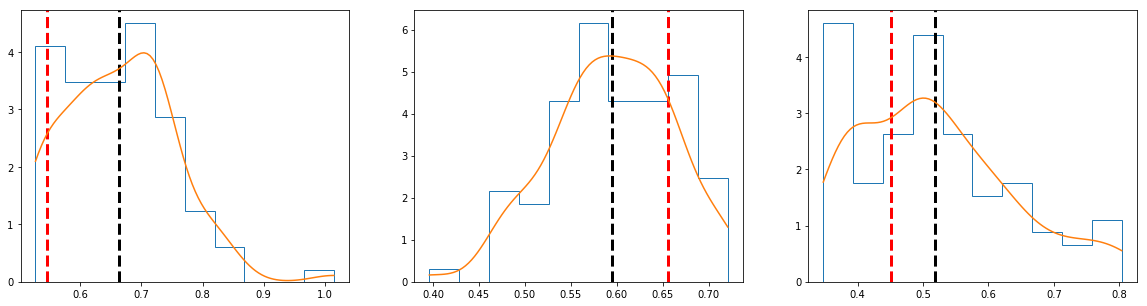

In [83]:
#i = 0
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i, ax in enumerate(axs):
    y = y_preds[i]
    x = np.linspace(y.min(), y.max(), 100)

    ax.axvline(y_pred[i], c='k', ls='--', lw='3')
    ax.axvline(y_test[i], c='r', ls='--', lw='3')

    ax.hist(y, density=True, histtype='step')

    pdf = gaussian_kde(y).pdf(x)

    ax.plot(x, pdf)

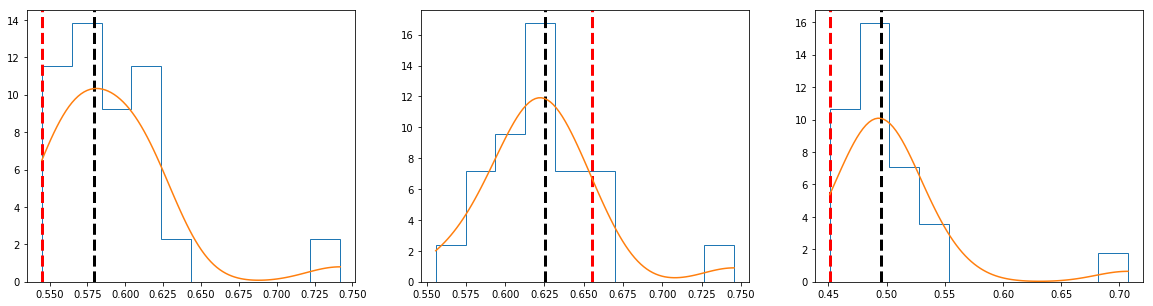

In [18]:
#i = 1
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i, ax in enumerate(axs):
    y = ex.values[i]
    x = np.linspace(ex.values[i].min(), ex.values[i].max(), 100)

    ax.axvline(y_pred[i], c='k', ls='--', lw='3')
    ax.axvline(y_test[i], c='r', ls='--', lw='3')

    ax.hist(y, density=True, histtype='step')

    pdf = gaussian_kde(y).pdf(x)

    ax.plot(x, pdf)
